# **Sentiment Analysis using NLTK - VADER & ROBERTa Model**

In this notebook, we will be doing Sentiment Analysis in Python using two popular techniques and comparing the results

1.   VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of Words apporach
2.   ROBERTa (Robustly Optimized BERT Apporach) from 🤗 Hugging Face

We will be also creating a Hugging Face Pipeline to ease the process of Sentiment Analysis



## Step 1: Import Libraries


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

## Step 2: Install Required Libraries

In [134]:
!pip install svgling
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.5 MB/s eta 0:00:00


In [91]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### Read the Data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [7]:
review_ds = pd.read_csv("Reviews.csv")

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review.

### Understanding the Data

In [8]:
review_ds.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
review_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [10]:
review_ds.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [12]:
review_ds.shape

(568454, 10)

In [13]:
review = review_ds.head(500)

In [15]:
review

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


## Understanding the Total Review Stars

In [32]:
plt.style.use('ggplot')

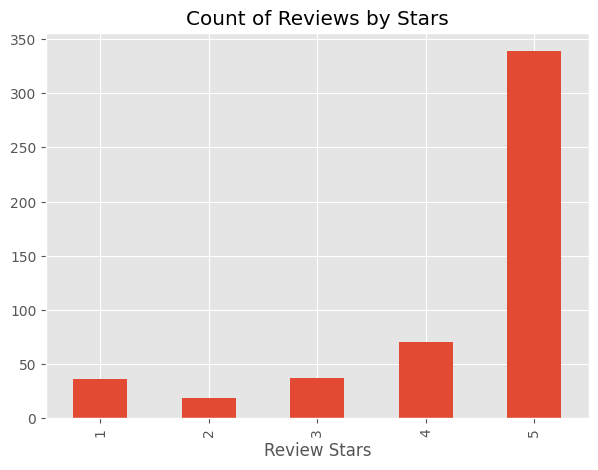

In [30]:
stars_ax = review['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(7,5))
stars_ax.set_xlabel('Review Stars')
plt.show()

## Step 3: Basic NLTK

In [38]:
sample_ex = review['Text'][45]
sample_ex

"This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again."

In [72]:
tokens = nltk.word_tokenize(sample_ex)
tokens = tokens[29:50]

In [69]:
pos_data = [['CC',	'coordinating conjunction'],
['CD',	'cardinal digit'],
['DT',	'determiner'],
['EX',	'existential there'],
['FW',	'foreign word'],
['IN',	'preposition/subordinating conjunction'],
['JJ',	'This NLTK POS Tag is an adjective (large)'],
['JJR',	'adjective, comparative (larger)'],
['JJS',	'adjective, superlative (largest)'],
['LS',	'list market'],
['MD',	'modal (could, will)'],
['NN',	'noun, singular (cat, tree)'],
['NNS',	'noun plural (desks)'],
['NNP',	'proper noun, singular (sarah)'],
['NNPS',	'proper noun, plural (indians or americans)'],
['PDT',	'predeterminer (all, both, half)'],
['POS',	'possessive ending (parent\ ‘s)'],
['PRP',	'personal pronoun (hers, herself, him, himself)'],
['PRP',	'possessive pronoun (her, his, mine, my, our )'],
['RB',	'adverb (occasionally, swiftly)'],
['RBR',	'adverb, comparative (greater)'],
['RBS',	'adverb, superlative (biggest)'],
['RP',	'particle (about)'],
['TO',	'infinite marker (to)'],
['UH',	'interjection (goodbye)'],
['VB',	'verb (ask)'],
['VBG',	'verb gerund (judging)'],
['VBD',	'verb past tense (pleaded)'],
['VBN',	'verb past participle (reunified)'],
['VBP',	'verb, present tense not 3rd person singular(wrap)'],
['VBZ',	'verb, present tense with 3rd person singular (bases)'],
['WDT',	'wh-determiner (that, what)'],
['WP',	'wh- pronoun (who)'],
['WRB',	'wh- adverb (how)']]

In [70]:
pos_df = pd.DataFrame(pos_data, columns=['Abbrevation','Meaning'])

In [71]:
pos_df

,Abbrevation,Meaning
0,CC,coordinating conjunction
1,CD,cardinal digit
2,DT,determiner
3,EX,existential there
4,FW,foreign word
5,IN,preposition/subordinating conjunction
6,JJ,This NLTK POS Tag is an adjective (large)
7,JJR,"adjective, comparative (larger)"
8,JJS,"adjective, superlative (largest)"
9,LS,list market


In [80]:
tagged = nltk.pos_tag(tokens)
tagged

[('did', 'VBD'),
 ("n't", 'RB'),
 ('pass', 'VB'),
 ('muster', 'NN'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('kids', 'NNS'),
 (',', ','),
 ('so', 'IN'),
 ('I', 'PRP'),
 ('probably', 'RB'),
 ('wo', 'MD'),
 ("n't", 'RB'),
 ('buy', 'VB'),
 ('it', 'PRP'),
 ('again', 'RB'),
 ('.', '.')]

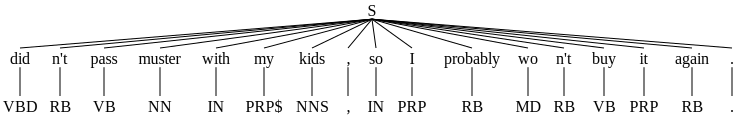

In [86]:
entities = nltk.chunk.ne_chunk(tagged)
entities

In [87]:
entities.pprint()

(S
  did/VBD
  n't/RB
  pass/VB
  muster/NN
  with/IN
  my/PRP$
  kids/NNS
  ,/,
  so/IN
  I/PRP
  probably/RB
  wo/MD
  n't/RB
  buy/VB
  it/PRP
  again/RB
  ./.)


## Step 4: **VADER Analysis**

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is with the polarity scores

In [92]:
sia = SentimentIntensityAnalyzer()

In [94]:
sia.polarity_scores('I dont like Apple')

{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

In [95]:
sia.polarity_scores('I love Jessie')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [100]:
sample_ex

"This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again."

In [98]:
sia.polarity_scores(sample_ex)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

### Run the polarity scores on the entire dataset

In [106]:
res = {}
for i, row in tqdm(review.iterrows(), total=len(review)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [122]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [123]:
vaders = vaders.merge(review, how="left")
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


### Plot VADER Results

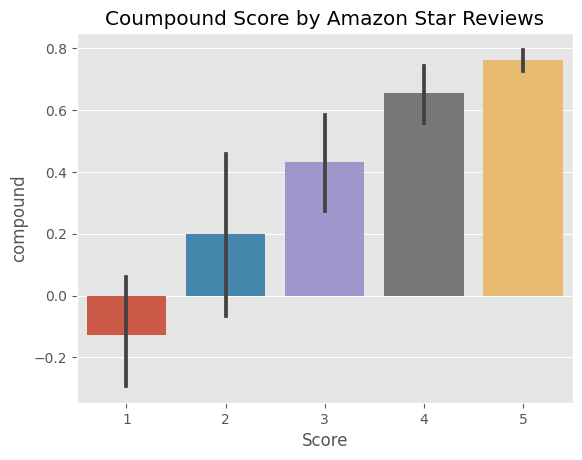

In [125]:
ax = sns.barplot(data = vaders, x='Score', y='compound')
ax.set_title("Coumpound Score by Amazon Star Reviews")
plt.show()

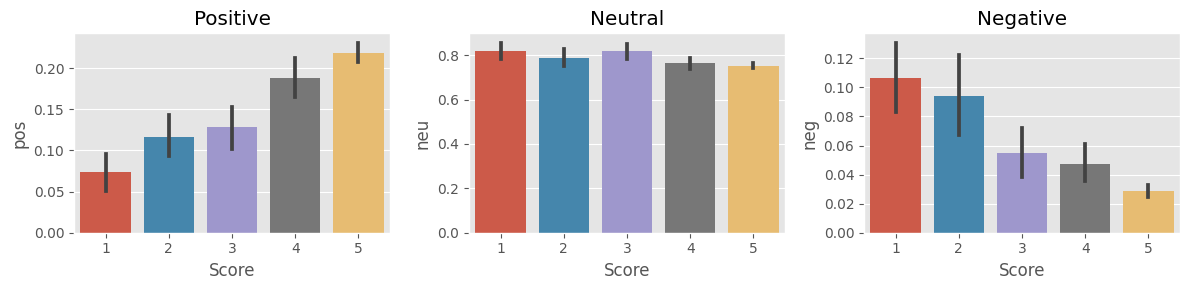

In [144]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Step 5: **ROBERTa Pretrained Model**

RoBERTa (short for “Robustly Optimized BERT Approach”) is a variant of the BERT (Bidirectional Encoder Representations from Transformers) model, which was developed by researchers at Facebook AI. Like BERT, RoBERTa is a transformer-based language model that uses self-attention to process input sequences and generate contextualized representations of words in a sentence. RoBERTa is a powerful and effective language model that has made significant contributions to the field of NLP and has helped to drive progress in a wide range of applications.

In [135]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [136]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [141]:
sample_ex

"This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again."

In [146]:
encoded_text = tokenizer(sample_ex, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores_dict

{'roberta_neg': 0.8868878,
 'roberta_neu': 0.09925424,
 'roberta_pos': 0.013857926}

In [148]:
def polarity_scores_roberta(sample_ex):
  encoded_text = tokenizer(sample_ex, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return scores_dict

### Run the polarity scores in the entire dataset

In [167]:
res = {}
for i, row in tqdm(review.iterrows(), total=len(review)):
  try:
      text = row['Text']
      myid = row['Id']
      vader_results = sia.polarity_scores(text)
      vader_results_rename = {}
      for key, value in vader_results.items():
        vader_results_rename[f"vader_{key}"] = value
      roberta_results = polarity_scores_roberta(text)
      both = {**vader_results_rename, **roberta_results}
      res[myid] = both
  except RuntimeError:
      print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [156]:
both

{'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441,
 'roberta_neg': 0.009624243,
 'roberta_neu': 0.049980447,
 'roberta_pos': 0.9403953}

In [169]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(review, how='left')

In [170]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
494,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
495,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
496,499,0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


## Compare Scores between models

In [171]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

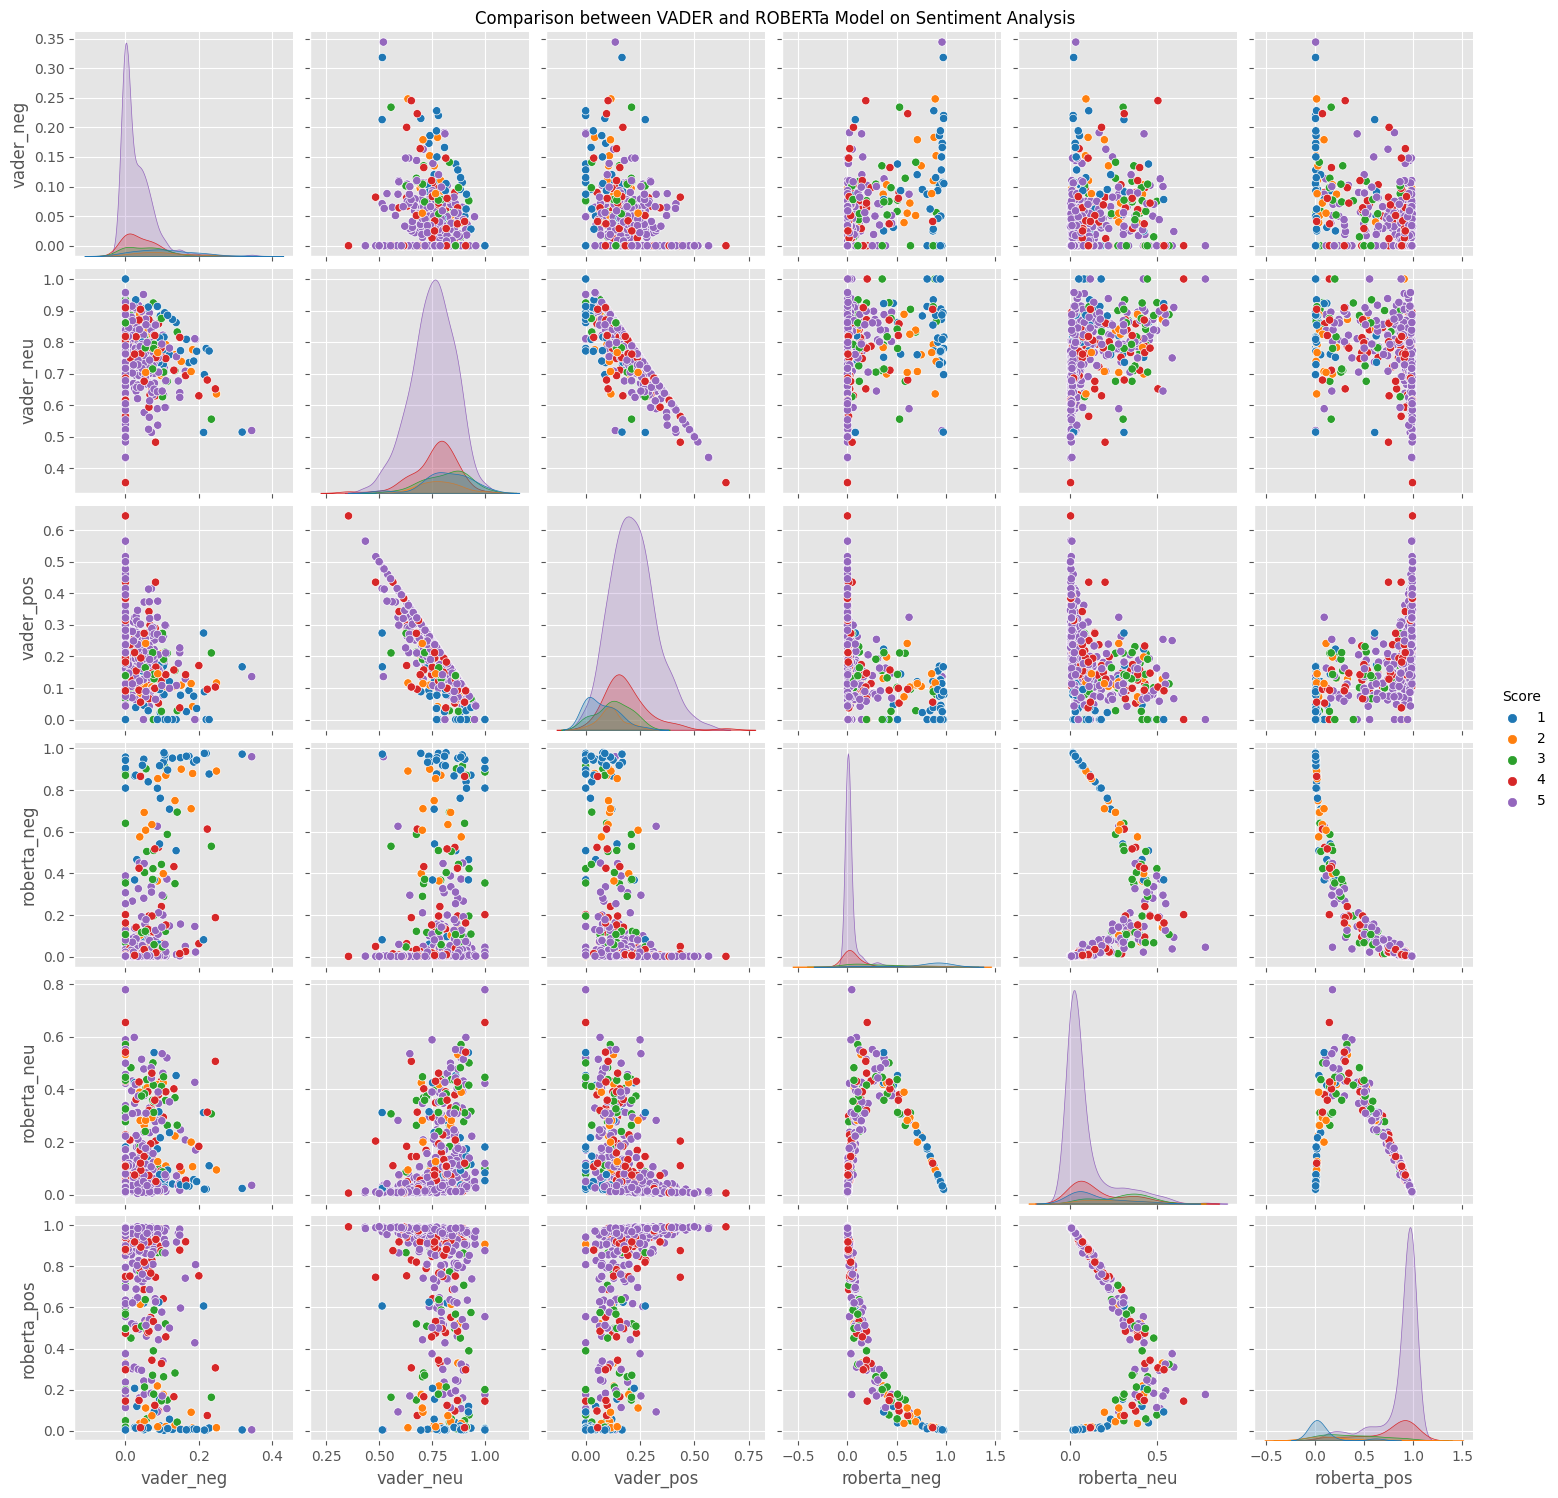

In [183]:
axi = sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue="Score",
             palette="tab10")
axi.fig.suptitle("Comparison between VADER and ROBERTa Model on Sentiment Analysis", y=1)
plt.show()

## Review Examples

Positive 1 Star Review

In [185]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [186]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

Negative 5 Star Review

In [187]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [188]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Creating a Transformers Pipeline


In [190]:
from transformers import pipeline
senti_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Testing with the pipeline

In [194]:
senti_pipeline("I love you, Jessie")

[{'label': 'POSITIVE', 'score': 0.9998438358306885}]

In [193]:
senti_pipeline("Let's breakup, Karthik")

[{'label': 'NEGATIVE', 'score': 0.9955008625984192}]